# Fourier Transformation | NB1 Library info
## Abstract
In this notebook I am trying to show how my library that contains three python files actually work. For more detailed theoretical aspects of FFT and Fourier Transform in general check out the [Notion](https://thisismeamir.notion.site/Fast-Fourier-Transform-8225af529e3643168e811751ff88c8cf) Page 

In [12]:
import matplotlib as mp
import matplotlib.pyplot as plt

## A class to define Mathematical Functions and Numeric Values
The first file in Library which is called `Functions.py` contains only one class that helps us define functions both numerically (using a CSV file or any coordiante dictionay) and Symbolically (For now only numpy but later on we will work on using sympy too!) Let's see the whole source code below and then have some examples to demonstrate how the class works. 

In [23]:
import numpy as np
import scipy as sc
import pandas as pd

'''
We first define a class of mathematical functions.
Symbolic functions are not yet implemented...
'''

class func2D():
    '''
    Class of mathematical Functions.
    '''
    def __init__(self, Numpy = "", Numeric = "", Symbols = ""):
        '''
        This method is the initial function for making a 2D mathematical function.
        First define Symbols in your function and then,
        you can use self.Numpy('Numpy expression: np.cos(x)') 
        or          self.Numeric ({"x": [], "y": []})
        to define the function in terms of coordinate numbers or symbolic term
        '''
        
        if Numpy != "":
            self.Numpy(Numpy,Symbols)
        elif Numeric != "":
            self.Numeric(Numeric)
        else:
            pass

    # ---------- Defining Methods ----------
    def Numpy(self, Expression, Symbols):
        '''
        This method gets a numpy function as a string and turns it to actual numpy function.
        '''

        Define = "lambda" + " " + Symbols + " :"
        exec('self.NumpyTerm = {0} {1}'.format(Define, Expression))
    
    def Numeric(self, Numeric):
        '''
        This method is resposible for recieving a set of coordinates and the coresponding value of the function.
        {'x': [1,3,4,5,6,7,8,15,17,18,100,230,...],
         'y': [13,15,1,6,4,52,37,37,563,6,745,...]}
         the lengths of 'x' and  'y' lists have to be equal. 
        '''
        assert len(Numeric['x']) == len(Numeric['y']), 'The two given lists are not equal'
        
        self.NumericTerm = Numeric
    
    # ---------- Turning Numeric ----------
    def TurnNumpyNumeric(self, Sample, Symbols="", Signal = False):
        '''
        Turns Numpy Expressions into Numeric functions.
        '''
        self.SampleLength = len(Sample)
        Sample = Sample
        y =[]
        if Symbols == "":
            for x in Sample:
                Eval = self.NumpyTerm(x)
                y.append(Eval)
        else:
            for x in Sample:
                # Eval = 0
                Eval = eval("self.NumpyTerm({0},{1})".format(x,Symbols))
                y.append(Eval)
        if Signal:
            return {'x': Sample, 'y': np.array(y)}
        else:
            self.NumericTerm = {'x': Sample, 'y': np.array(y)}


    def ImportFromCSV(self,path, columns =['','']):
        '''Importing Numeric Values from a CSV file.'''
        df = pd.read_csv(path, skipinitialspace=True)
        x = np.transpose(df[columns[0]].to_numpy())
        y = np.transpose(df[columns[1]].to_numpy())
        self.NumericTerm = {'x': x, 'y': y}
    
    # ---------- Static Methods ----------
    @staticmethod
    def LinearSampleMaker(Range, SampleNumber):
        '''
        Given a list for range and a SampleNumber this method generates a sample
        '''
        assert len(Range)==2, 'you should give a list of two numbers for Range of your Sample'
        assert SampleNumber//1 == SampleNumber,"SampleNumber should be an integer"
        Sample = np.linspace(Range[0], Range[1], SampleNumber)
        return Sample

    # ---------- Status ----------    
    def Ready(self,Stateof):
        '''
        Finding if an instance has symbolic,numeric,numpy expressions
        '''
        assert Stateof in ["Num", "Numpy"],'The argument should be "Num", "Numpy"'
        PossibleTerms = ["Num","Numpy"]
        terms= {"Num": self.NumericTerm, "Numpy": self.NumpyTerm}
        for term in PossibleTerms:
            if term == Stateof:
                if terms[term]!= "":
                    return True
                else:
                    return False
            else:
                return "Not Found."
        


### Example 1 | Defining some simple functions using Numpy
In this example we will define a simple function using the source code above. a sine function of x and two constants.

In [24]:
# Example 1.1 | Sine function
sin = func2D(Numpy= 'a*np.sin(b*x)', Symbols='x,a,b') # Defining
y0  = sin.NumpyTerm(np.pi/2,3,1) # Since Numpy Term is a python function you can set inputs and 
                                 # Numerical outputs based on Symbols you defined 
print(y0)

3.0


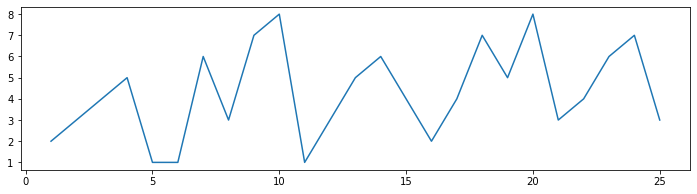

In [25]:
# Example 1.2 | A Numeric Function
Coordinates = {'x': [
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
], 'y': [
    2,3,4,5,1,1,6,3,7,8,1,3,5,6,4,2,4,7,5,8,3,4,6,7,3
]}
num = func2D(Numeric = Coordinates) # Defining

# Let's plot and see
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(num.NumericTerm['x'], num.NumericTerm['y'])

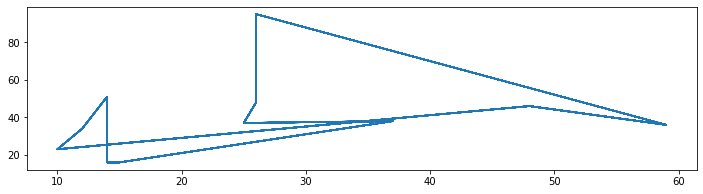

In [26]:
# Example 1.3 | Importing CSV file
csv = func2D()
csv.ImportFromCSV('./data.csv',['x','y'])

fig, ax = plt.subplots(figsize=(12,3))
ax.plot(csv.NumericTerm['x'], csv.NumericTerm['y']) # Which is the ugly image below XD 
# since it's not one to one corresponding.

### Example 2 | Turning Numpy Terms Numerically
In this Example I demonnstrated how can you turn what you defined using numpy, to a numerical coordiantes using Sample for x, which can be defined using the static method `LinearSampleMaker()`. using the sine function we already defined.

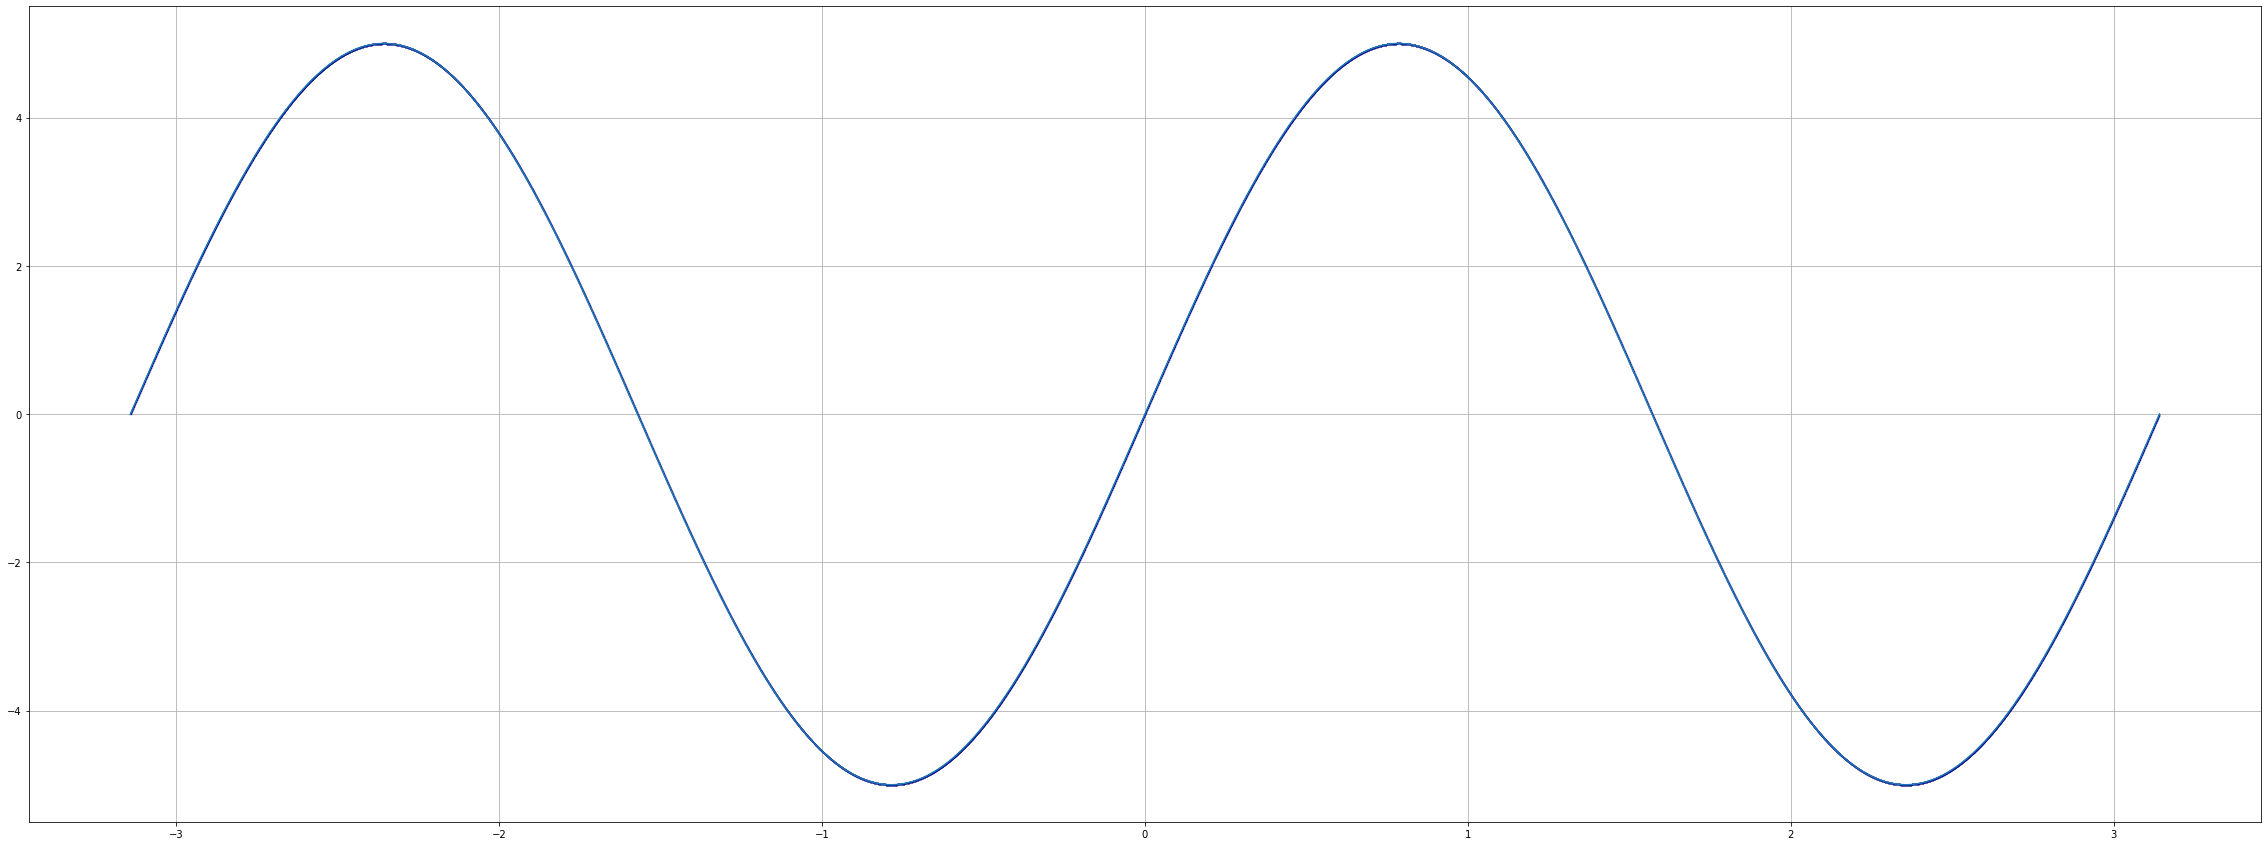

In [43]:
# Example 2.1 | sine function numerical
xSample = func2D.LinearSampleMaker([-np.pi,np.pi], 44100) # We are making a sample of 44100 points 
                                                          # between -pi to pi.
sin.TurnNumpyNumeric(xSample, Symbols="5,2")

fig, ax = plt.subplots(figsize=(40,15))
plt.grid(True)
ax.plot(sin.NumericTerm['x'], sin.NumericTerm['y'], marker='o', ms=0.2, linestyle='None', c='darkblue')
ax.plot(sin.NumericTerm['x'], sin.NumericTerm['y']) # Which is the ugly image below XD 
# since it's not one to one corresponding.

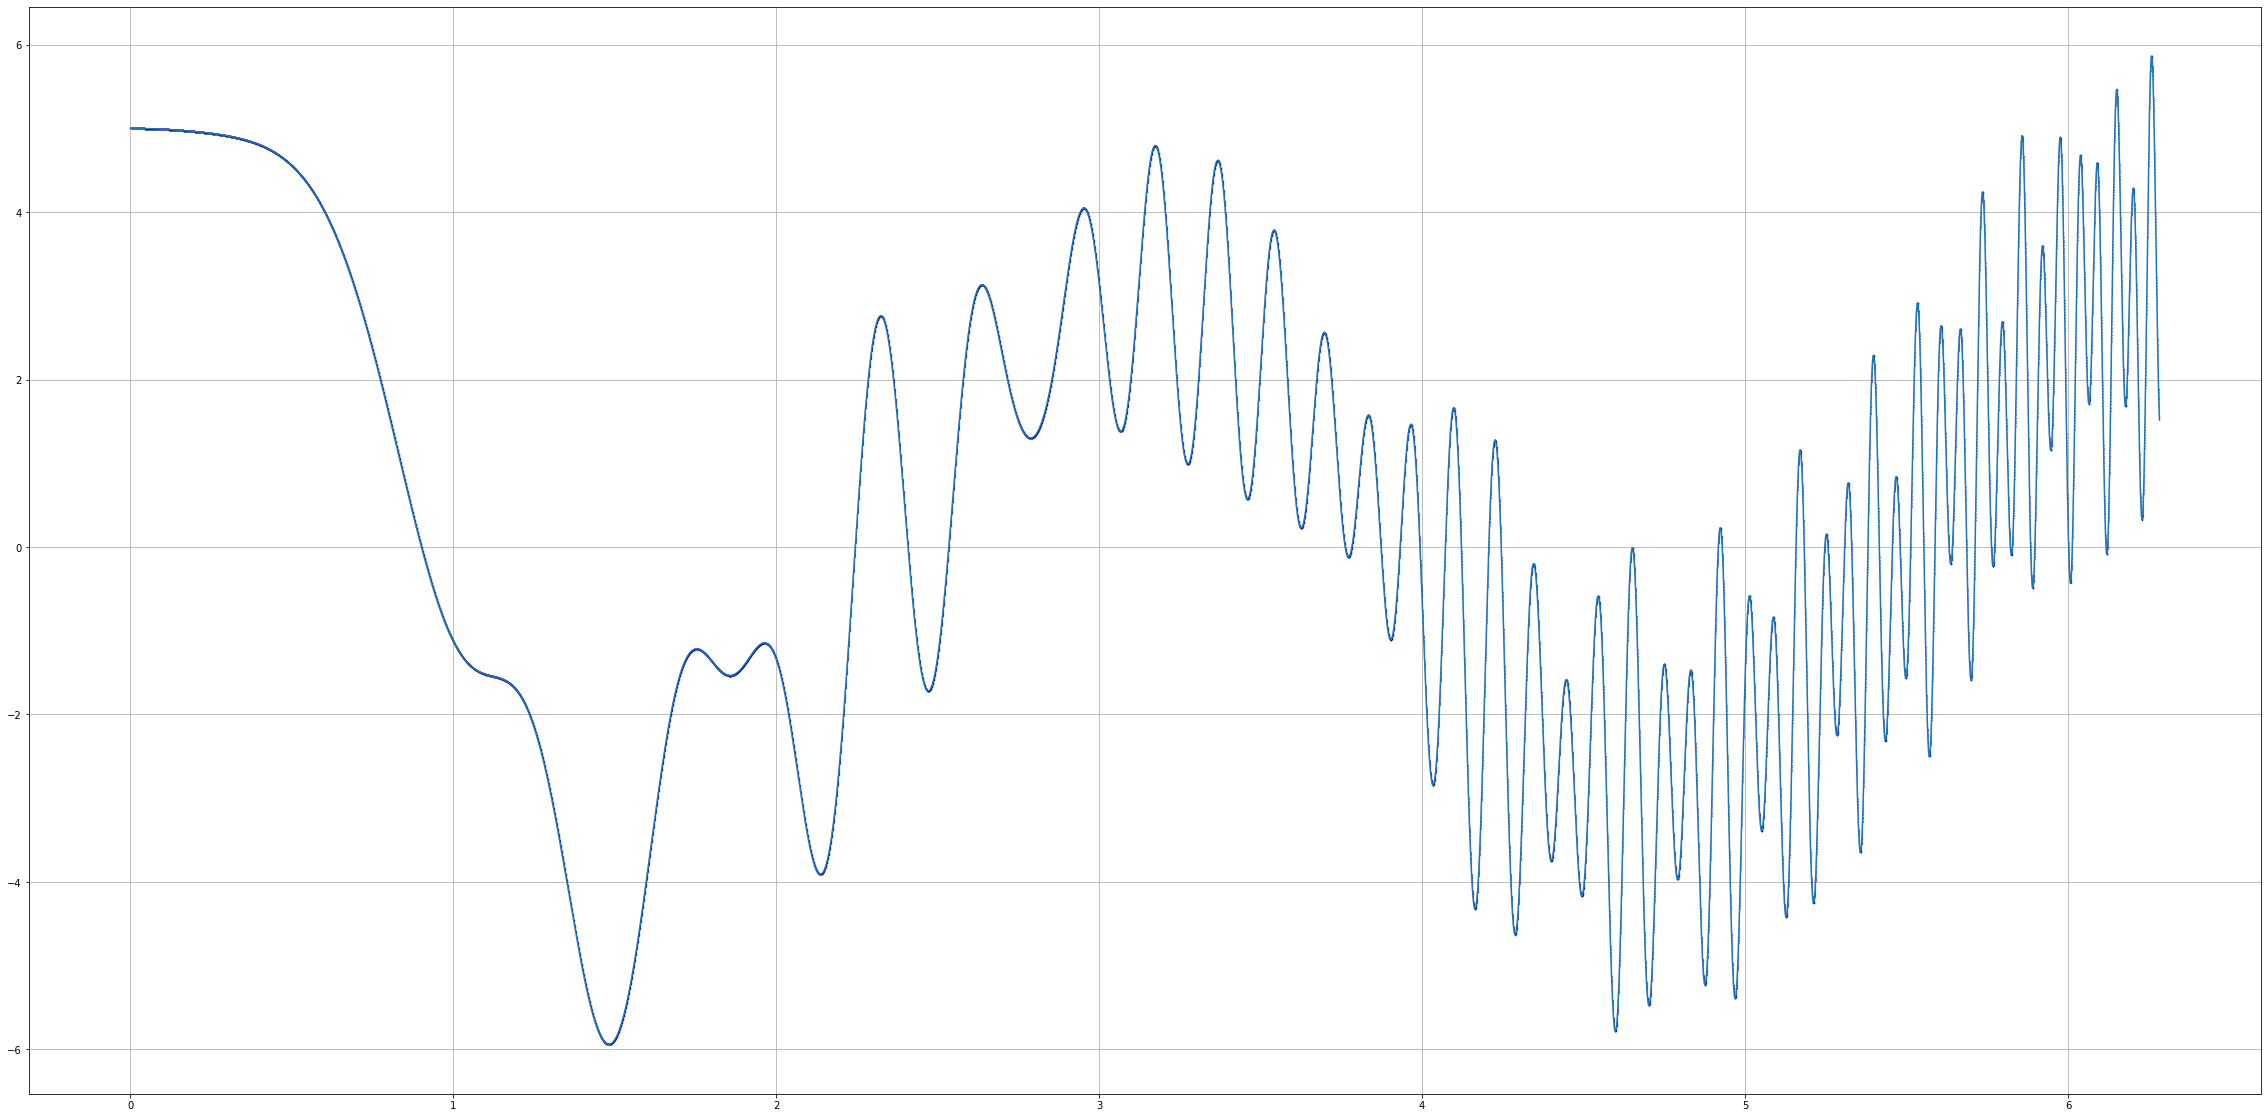

In [40]:
# Example 2.2 | More complicated function
func = func2D(Numpy='np.sin(a*x**2)+b*np.cos(x**3)+c* np.cos(x*(-2))', Symbols='x,a,b,c')
xSample = func2D.LinearSampleMaker([0,2*np.pi], 44100) # We are making a sample of 44100 points 
                                                          # between -pi to pi.
func.TurnNumpyNumeric(xSample, Symbols="5,2,3")
fig, ax = plt.subplots(figsize=(40,20))

plt.grid(True)
ax.plot(func.NumericTerm['x'], func.NumericTerm['y'], marker='o', ms=0.2, linestyle='None', c='darkblue')
ax.plot(func.NumericTerm['x'], func.NumericTerm['y']) # Which is the ugly image below XD 
# since it's not one to one corresponding.

# A Class to define Signals
The Second File Contains one class to define signals which is a child of the first class we explored above.


In [130]:
from msilib.schema import File
import numpy as np
import scipy as sc
from scipy.io.wavfile import write 

class Signal(func2D):
    def __init__(self, SampleRate, Numpy="", Numeric="", Symbols="", ):
        '''
        Initial Signal Making.
        '''
        super().__init__(Numpy, Numeric, Symbols)
        self.SampleRate = SampleRate


    # ---------- Making a Sample from a Signal ----------
    def SampleMaker(self, Range: list, Constants='', Length = 1):
        '''
        Making a Sample from a given numpy signal
        '''
        assert len(Range) == 2, "Range should be in the form  [a,b]."
        self.SampleDuration = Length
        SampleNumber = int(self.SampleDuration * self.SampleRate)
        x = func.LinearSampleMaker(Range, SampleNumber)
        self.SignalSample = self.TurnNumpyNumeric(x, Constants, Signal = True)
        self.SignalSampleVar = self.SignalSample['x']
        self.SignalSample = self.SignalSample['y']
        self.Sampled = True
        
    def Normalizer(self,Amplitude = 1):
        '''
        Generalized Normalizer
        '''
        self.SignalSample = np.int16((self.SignalSample/self.SignalSample.max())*Amplitude)
    
    def NormalizerInt16(self):
        '''
        Normalizing the sample for audio making
        '''
        self.SignalSample = np.int16((self.SignalSample/self.SignalSample.max())*32767)

    # ---------- Audio ----------
    def NumericAudioCreator (self, Duration, FileName="wave"):
        '''
        Turning a Signal into audio.
        '''
        Repeat   = Duration//self.SampleDuration
        wave = np.array([])
        i = 0
        while i < Repeat:
            wave = np.concatenate((wave, self.SignalSample), axis=None)
            i +=1
        write(f"{FileName}.wav", self.SampleRate, wave)

    # ---------- Audio from Numpy ----------
    def NumpyAudioCreator (self, Duration, Range, Constants, Length, FileName="wave"):
        '''
        Turning a numpy term into audio.
        '''
        assert self.Ready('Numpy')
        self.SampleMaker(Range,Constants,Length)
        self.NumericAudioCreator(Duration, FileName)

### Example 1 | Define some simple signals
The major thing about signal class is that You have to define a SampleRate which is the number of times we are taking samples from the data source (device or a mathematical function.) in one second.

In [131]:
# Example 1.1 | sine signal
signal1 = Signal(44100, Numpy='np.sin(x)', Symbols='x')
#Example 1.2 | sine + cosine with different phase signal
signal2 = Signal(44100, Numpy='np.sin(a*x)+np.cos(b*x)', Symbols='x,a,b')


### Example 2 | Making a Sample out of the signal definition
Now that you defined a signal you can take a sample from a range you like with given constants

In [132]:
# Example 1.1 | sine signal
signal1.SampleMaker([0,2*np.pi], '', 1) # from 0 to 2pi, length 1 second.
#Example 1.2 | sine + cosine with different phase signal
signal2.SampleMaker([0,2*np.pi], '2,3', 0.1)# from 0 to 2pi with a=2,b=3 and for length 1 second.

In [133]:
print(signal1.Sampled, signal2.Sampled) # Check if they are sampled alright.

True True


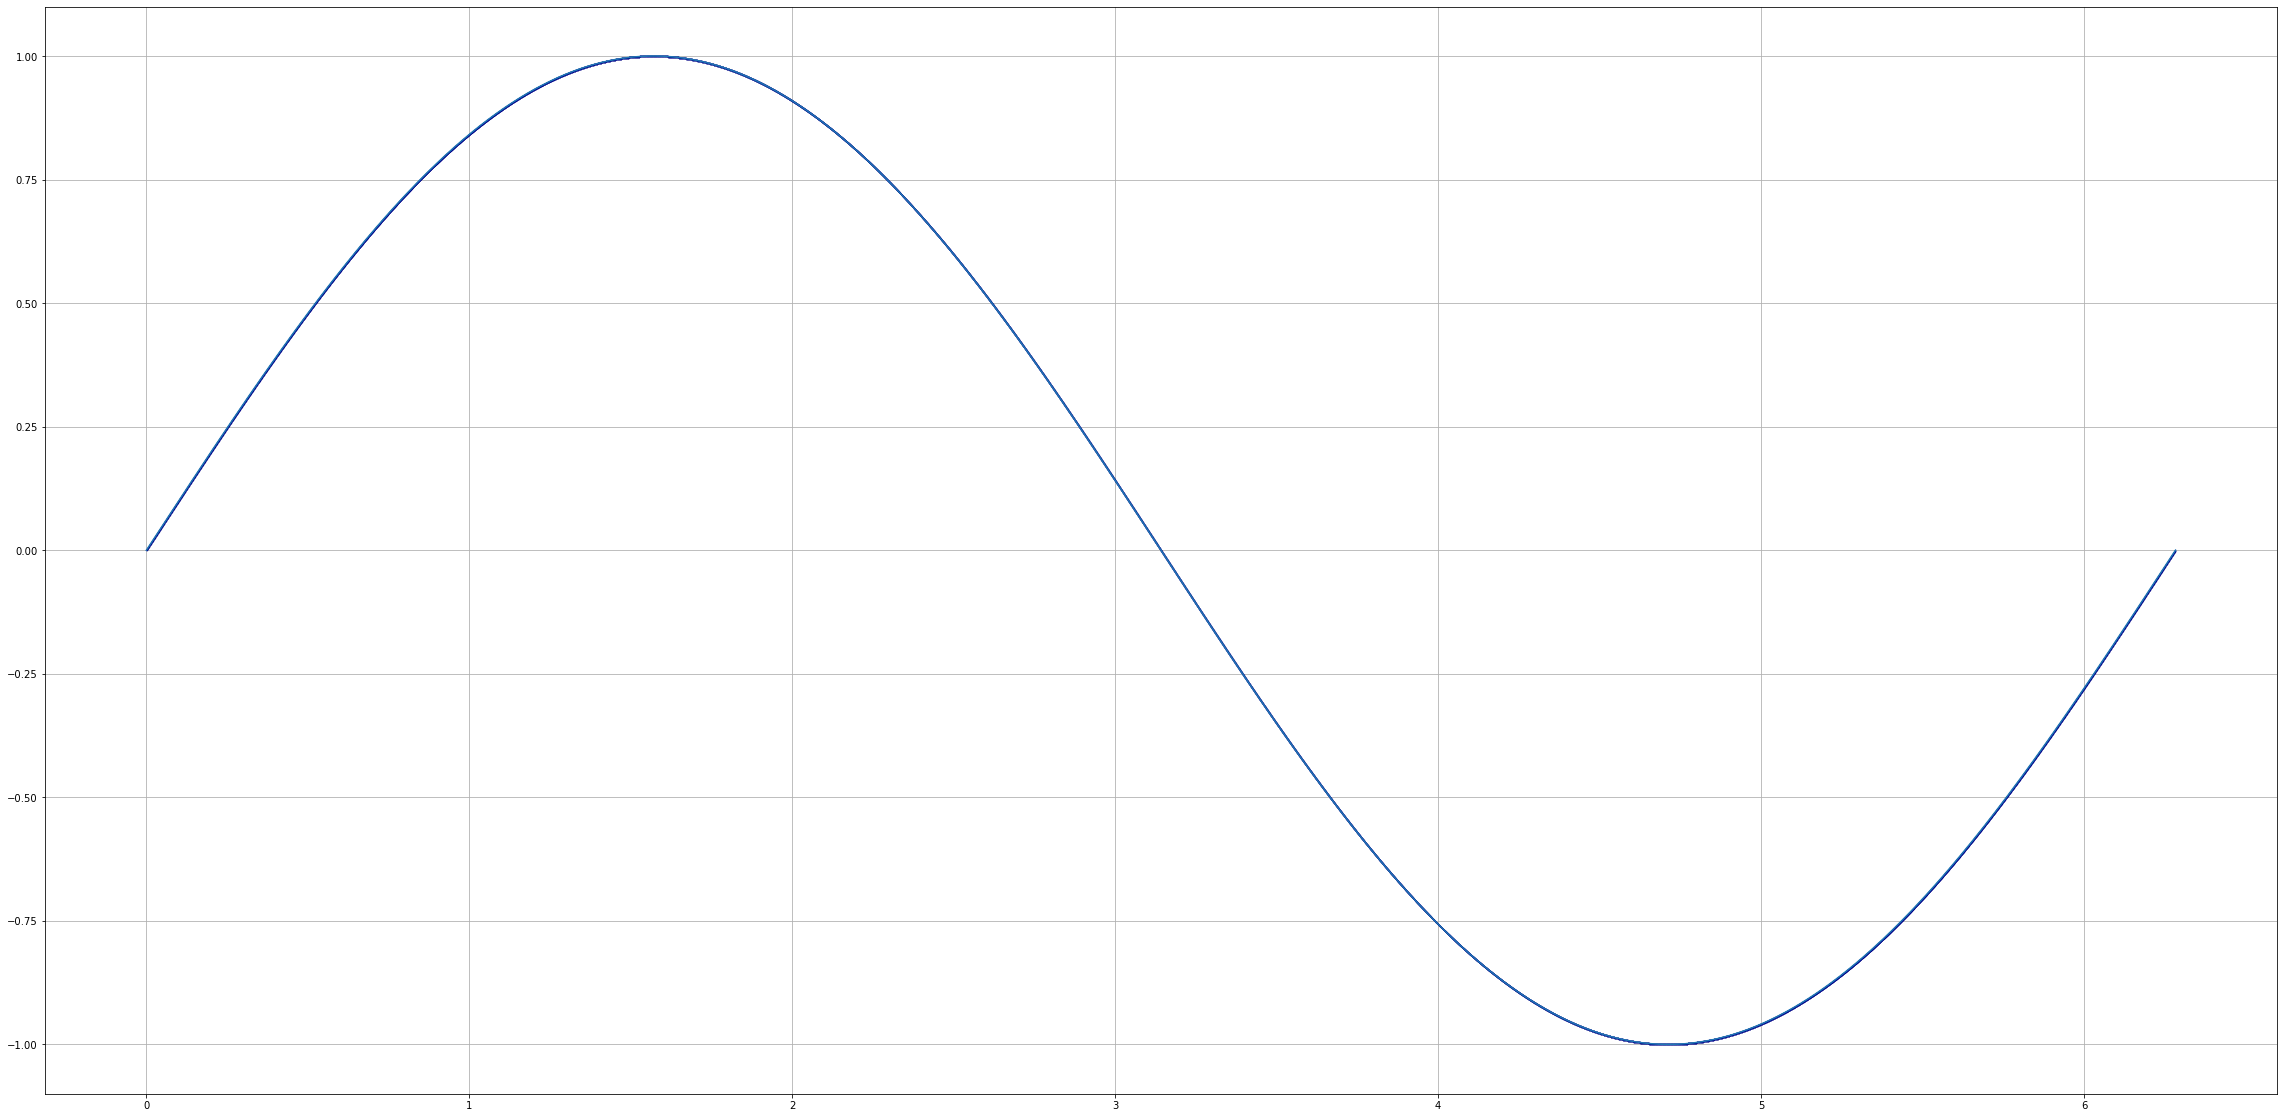

In [134]:
fig, ax = plt.subplots(figsize=(40,20))

plt.grid(True)
ax.plot(signal1.SignalSampleVar, signal1.SignalSample, marker='o', ms=0.2, linestyle='None', c='darkblue')
ax.plot(signal1.SignalSampleVar, signal1.SignalSample) # Which is the ugly image below XD 
# since it's not one to one corresponding.

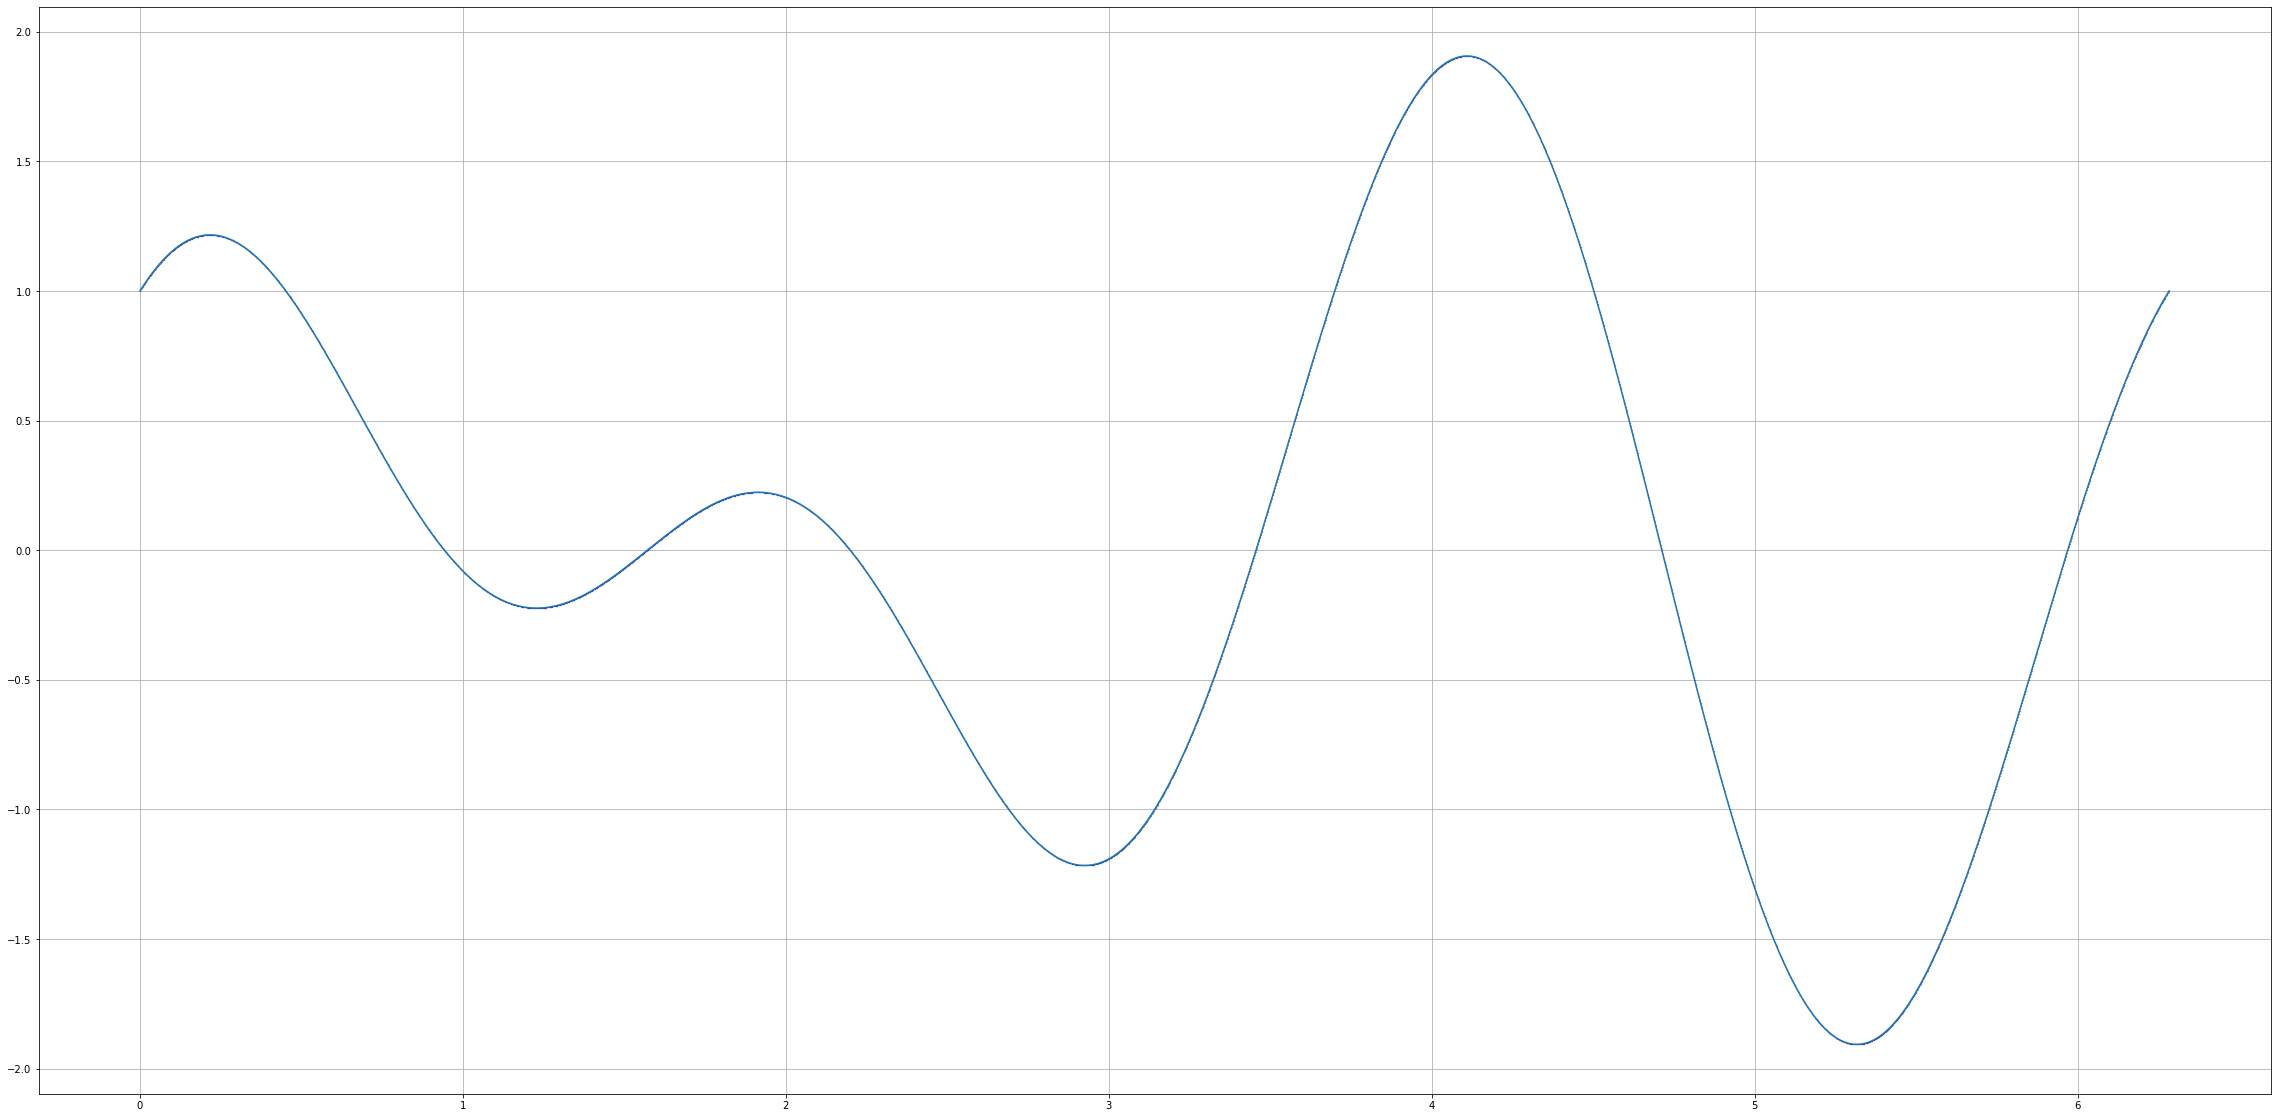

In [135]:
fig, ax = plt.subplots(figsize=(40,20))

plt.grid(True)
ax.plot(signal2.SignalSampleVar, signal2.SignalSample, marker='o', ms=0.2, linestyle='None', c='darkblue')
ax.plot(signal2.SignalSampleVar, signal2.SignalSample) # Which is the ugly image below XD 
# since it's not one to one corresponding.

### Example 3 | Making an Audio out of our Sample
You can also make an actual audio out of the sample we just made, this would also help us when we are working with some noise canceling problems or just to have a view on the signal we are making.

In [136]:
signal1.NormalizerInt16() 
signal1.NumericAudioCreator(10, FileName='sineWave') # 10 second .wav file is created in the directory.

In [128]:

signal2.NormalizerInt16()
signal2.NumericAudioCreator(10, FileName='sinecosineWave') # 10 second .wav file is created in the directory.

# Processing Signals
In this section we have our final file `Processing.py` and it's classes that would help us in different areas depending on what we need to do

In [137]:
import scipy  as sc
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq

class SignalProcessing():
    def __init__(self):
        pass

    @staticmethod
    def fft(SampleRate, Duration, Signal, key=""):
        '''
        Easy fft for signals!
        '''
        assert key in ['both', 'freq', ''], "key should be in ['both', 'freq', '']."
        SampleLength = SampleRate * Duration
        Amplitudes = fft(Signal)
        Frequencies = fftfreq(SampleLength,1/SampleRate)
        # Returns
        if key == 'both':
            return Amplitudes, Frequencies
        elif key =='freq':
            return Frequencies
        elif key =='':
            return Amplitudes
        else:
            pass

    @staticmethod
    def rfft(SampleRate, Duration, Signal, key=""):
        '''
        Easy fft for signals!
        '''
        assert key in ['both', 'freq', ''], "key should be in ['both', 'freq', '']."
        SampleLength = SampleRate * Duration
        Amplitudes = rfft(Signal)
        Frequencies = rfftfreq(SampleLength,1/SampleRate)
        # Returns
        if key == 'both':
            return Amplitudes, Frequencies
        elif key =='freq':
            return Frequencies
        elif key =='':
            return Amplitudes
        else:
            pass

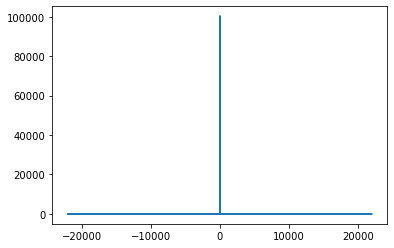

In [138]:
sig = Signal(44100, Numpy='np.sin(x)', Symbols='x')
sig.SampleMaker([0,3*np.pi/2], '', 5) # from 0 to 2pi, length 1 second.

# Using our function
ampfft, freqfft = SignalProcessing.fft(sig.SampleRate, 5, sig.SignalSample, key='both')

# Plotting
plt.plot(freqfft, np.abs(ampfft))
plt.show()

### Example 1 | simple signals and FFT
Let's look at the first static method `fft()`.

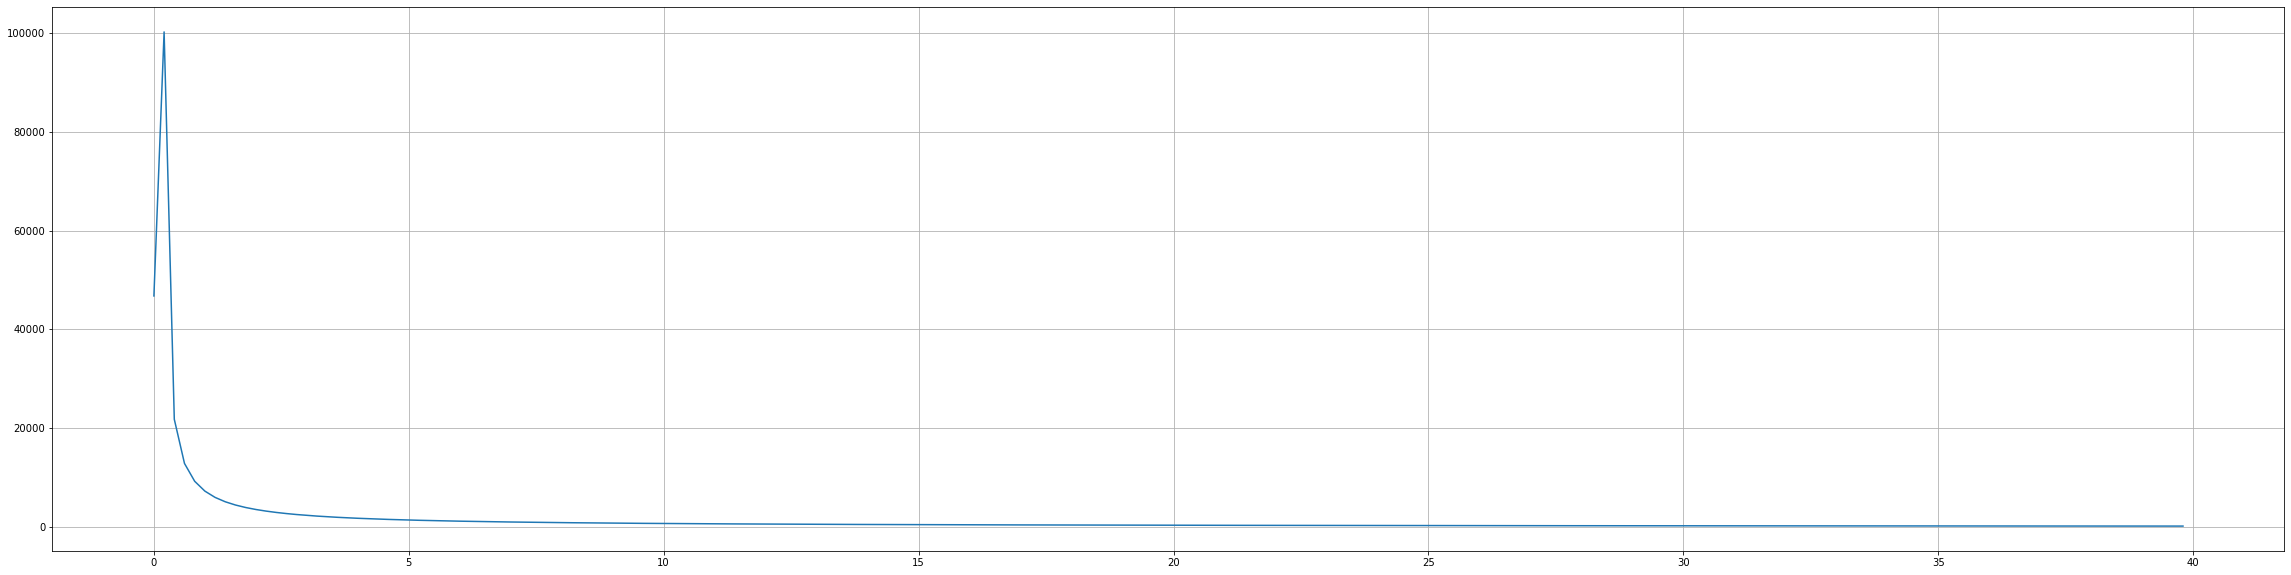

In [146]:
# Example 1.1 | sine signal
sig = Signal(44100, Numpy='np.sin(x)', Symbols='x')
sig.SampleMaker([0,3*np.pi/2], '', 5) # from 0 to 2pi, length 1 second.

# Using our function
ampfft, freqfft = SignalProcessing.fft(sig.SampleRate, 5, sig.SignalSample, key='both')

# Plotting
fig2,ax3 = plt.subplots(figsize=(40,10))
ax3.grid(True)
ax3.plot(freqfft[0:200], np.abs(ampfft)[0:200])

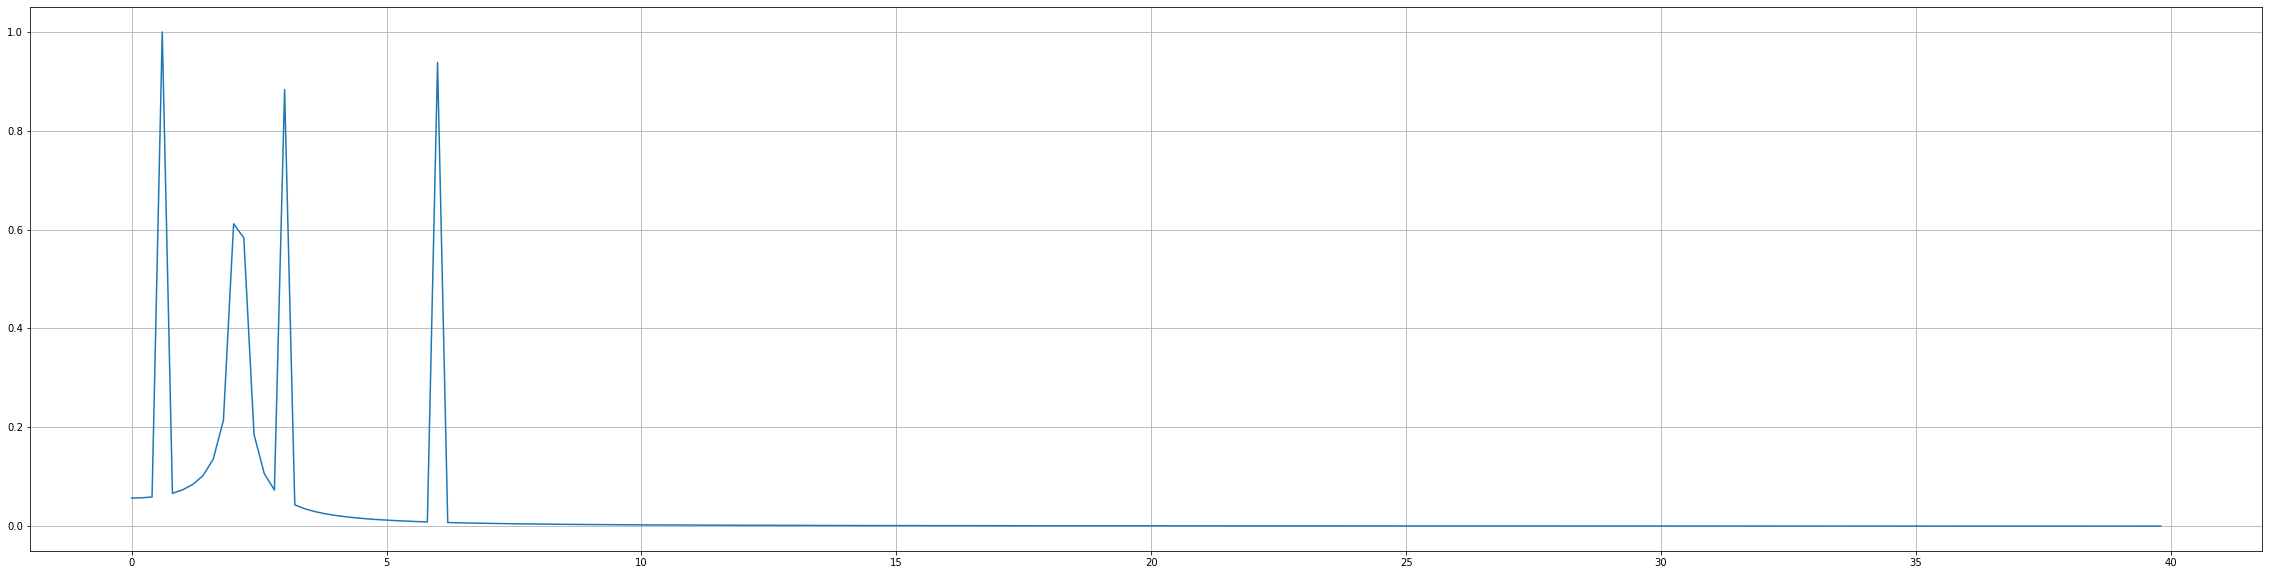

In [147]:
#Example 1.2 | sine + cosine with different phase signal
signal2 = Signal(44100, Numpy='np.sin(a*x)+np.cos(b*x)+np.sin(c*x)+np.cos(d*x)', Symbols='x,a,b,c,d')
signal2.SampleMaker([0,3*np.pi], '20,10,7,2', 5)# from 0 to 2pi with a=2,b=3 and for length 1 second.

# Using our function
ampfft2, freqfft2 = SignalProcessing.fft(signal2.SampleRate, 5, signal2.SignalSample, key='both')

#Normalizing amplitude
ampfft2 = np.divide(ampfft2,ampfft2.max())
# Plotting
fig2,ax3 = plt.subplots(figsize=(40,10))
ax3.grid(True)
ax3.plot(freqfft2[0:200], np.abs(ampfft2)[0:200])


### Example 2 | rFFT
The frequency spectrum that fft() outputted was reflected about the y-axis so that the negative half was a mirror of the positive half. This symmetry was caused by inputting real numbers (not complex numbers) to the transform.

You can use this symmetry to make your Fourier transform faster by computing only half of it. scipy.fft implements this speed hack in the form of rfft().


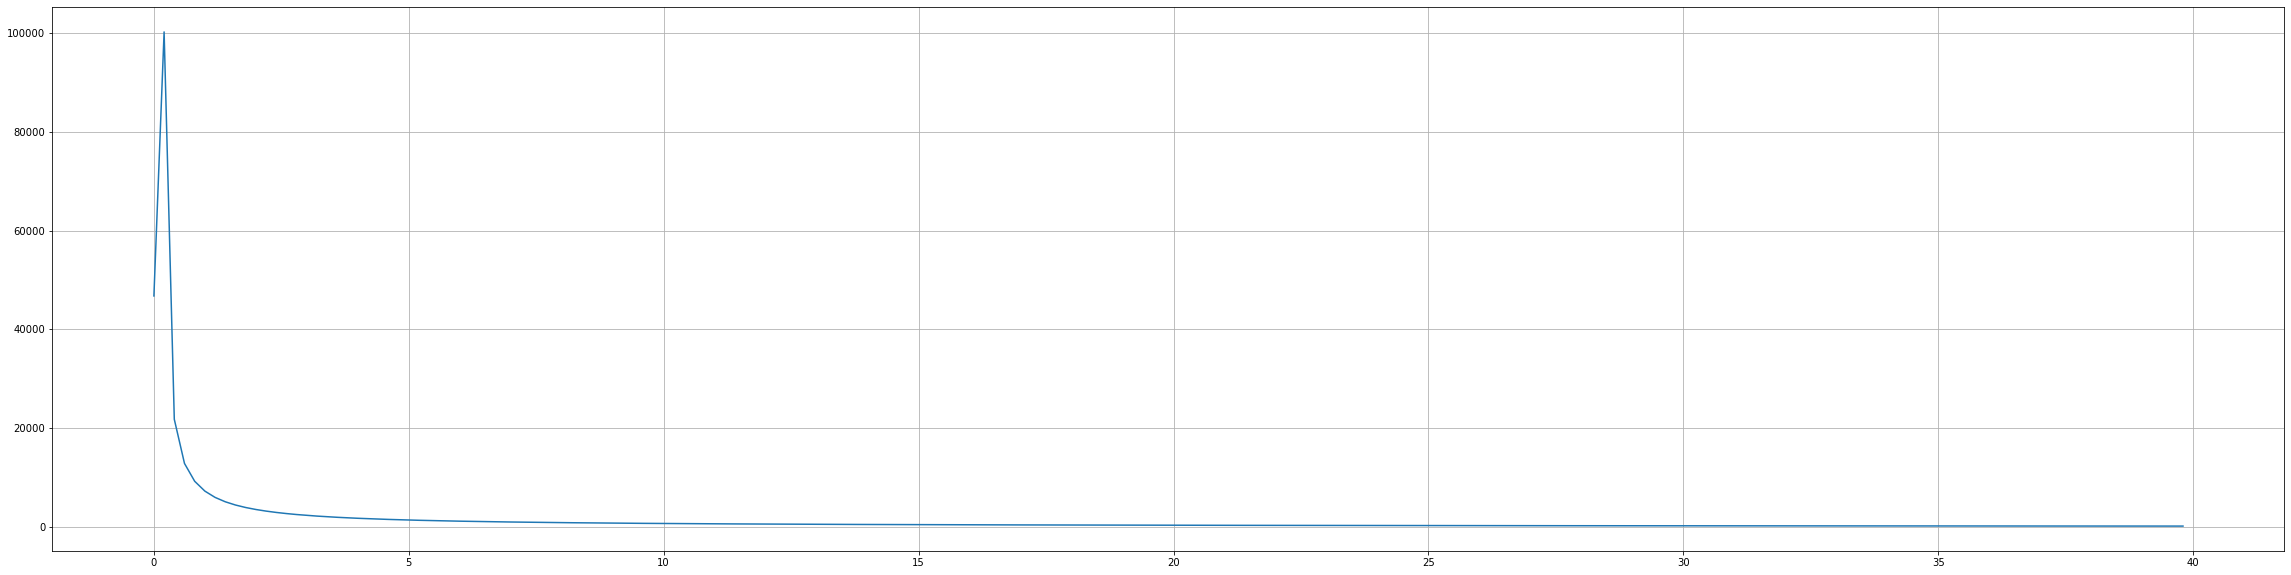

In [148]:
sig = Signal(44100, Numpy='np.sin(x)', Symbols='x')
sig.SampleMaker([0,3*np.pi/2], '', 5) # from 0 to 2pi, length 1 second.

# Using our function
ampfft, freqfft = SignalProcessing.rfft(sig.SampleRate, 5, sig.SignalSample, key='both')

# Plotting
fig2,ax3 = plt.subplots(figsize=(40,10))
ax3.grid(True)
ax3.plot(freqfft[0:200], np.abs(ampfft)[0:200])

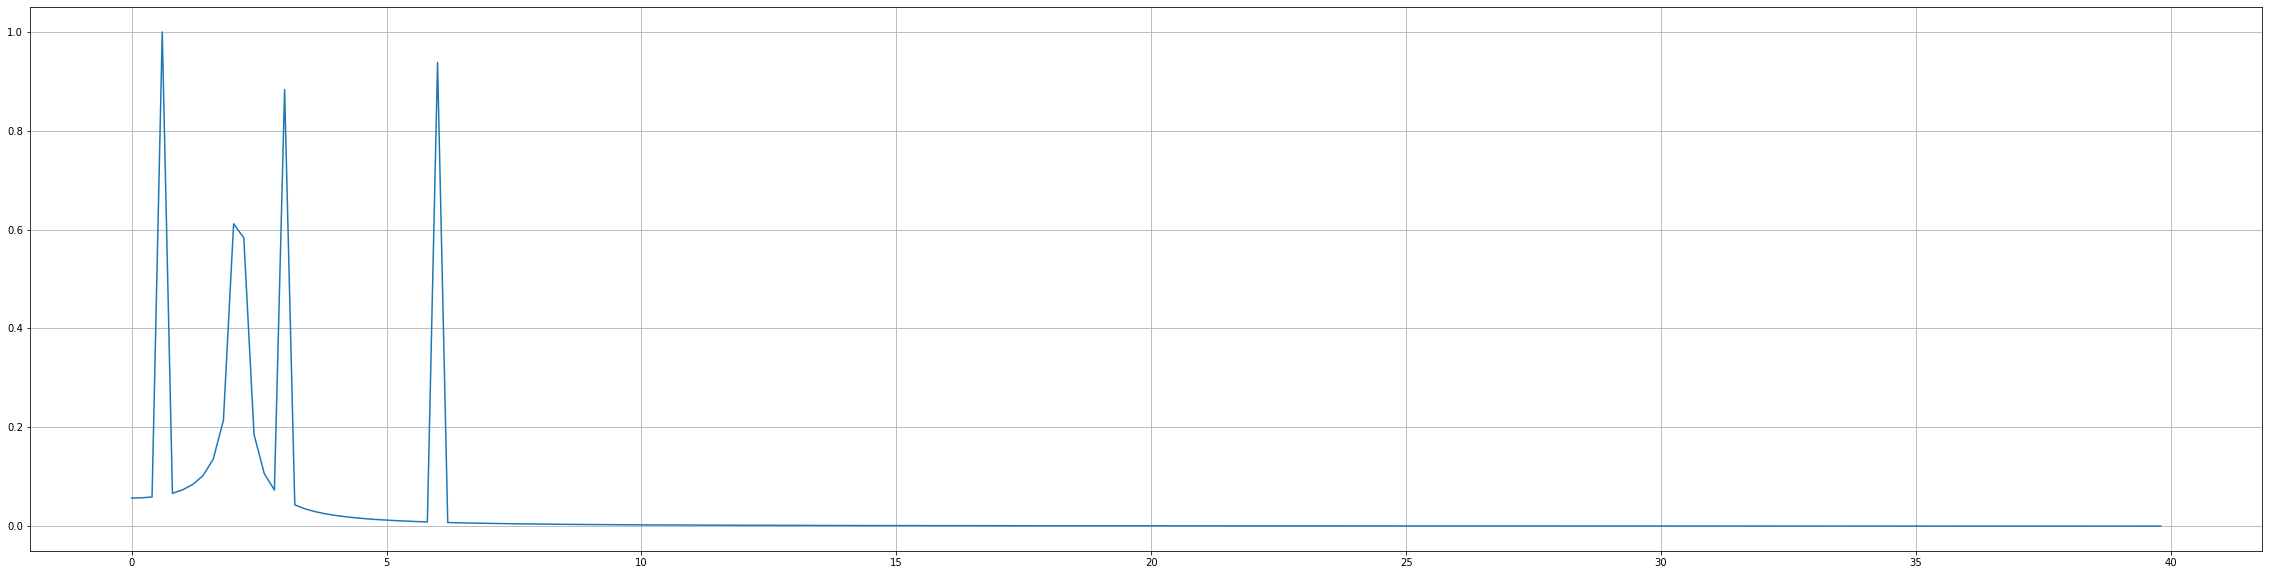

In [149]:
#Example 1.2 | sine + cosine with different phase signal
signal2 = Signal(44100, Numpy='np.sin(a*x)+np.cos(b*x)+np.sin(c*x)+np.cos(d*x)', Symbols='x,a,b,c,d')
signal2.SampleMaker([0,3*np.pi], '20,10,7,2', 5)# from 0 to 2pi with a=2,b=3 and for length 1 second.

# Using our function
ampfft2, freqfft2 = SignalProcessing.rfft(signal2.SampleRate, 5, signal2.SignalSample, key='both')

#Normalizing amplitude
ampfft2 = np.divide(ampfft2,ampfft2.max())
# Plotting
fig2,ax3 = plt.subplots(figsize=(40,10))
ax3.grid(True)
ax3.plot(freqfft2[0:200], np.abs(ampfft2)[0:200])


### Example 3 | A noisy sine wave channel
Let's look at a sine wave that has been sent to us using a very noisy channel!